<a href="https://colab.research.google.com/github/rohitrokz29/biomass-to-jetfuel/blob/main/biomass_to_jet_fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FTR REACTOR RYIELD**

yield of n-order Paraffing ASF Model


Wn=(1-a)*(a^(n-1))

sum(Wn)+H2O(15)+ CO2(2) >100 then Scaling Factor SF

SF=(100-(H2O+CO2))/sum(Wn)

Wn_new=Wn*SF

now sum(Wn_new+H2O+CO2)=100

# FTR Yield Data Generation from biomass result

In [4]:
import numpy as np
import pandas as pd


In [5]:

def calculate_yield_hydrocarbon(n, a):
    yields = []
    for i in range(1, n+1):  # Ensure it includes n
        yields.append((1 - a) * (a**(i-1)) * 100)
    return yields

def print_yield_table(n_yield, H2O, CO2):
    till_c_18_sum=n_yield.sum()+H2O+CO2-n_yield[n_yield.size-1]
    if(n_yield.sum()+H2O+CO2<100):
      n_yield[n_yield.size-1]=100.00-till_c_18_sum
    yield_table = pd.DataFrame(columns=['HC-Range', 'Yield (%)'])

    for i in range(len(n_yield)):
        new_row = pd.DataFrame([{"HC-Range": f"Carbon-{i+1}", "Yield (%)": n_yield[i]}])
        yield_table = pd.concat([yield_table, new_row], ignore_index=True)

    new_rows = pd.DataFrame([['H2O', H2O], ['CO2', CO2]], columns=['HC-Range', 'Yield (%)'])
    yield_table = pd.concat([yield_table, new_rows], ignore_index=True)

    display(yield_table)


# calculation start form here
def calculate_for_biomass(name,H2,CO):
  # Given parameters
  a = 3.00-H2/CO  # Chain growth probability alpha
  H2O = 15  # Water yield
  CO2 = 2    # CO2 yield
  n=19

# Compute ASF-based hydrocarbon yields for C1-C20
  n_yield_less_20 = np.array(calculate_yield_hydrocarbon(n, a))

# Normalize if total exceeds 100%
  all_sum = n_yield_less_20.sum() + H2O + CO2
  if all_sum > 100:
      SF = (100 - (H2O + CO2)) / n_yield_less_20.sum()  # Scaling Factor
      n_yield_less_20 *= SF  # Scale hydrocarbons
  print(f"name: {name}, H2:{H2},CO:{CO}, a={a}")
# Print the final yield table

  print_yield_table(n_yield_less_20, H2O, CO2)

# Verify final sum is exactly 100%
  print(f"Final Total Yield: {n_yield_less_20.sum() + H2O + CO2:.2f}%")


In [6]:

biomass_result=pd.read_csv("https://docs.google.com/spreadsheets/d/1xogZ0K7gRvvukae3BMCq91AbCyHS6QY6VOzNGRAYKgg/gviz/tq?tqx=out:csv&sheet=biomass-syngas-variation"
)
# biomass_list=np.array(biomass_result["biomass"])

for i in range(len(biomass_result)):
  calculate_for_biomass(biomass_result['biomass'].iloc[i],biomass_result['H2(kmol/hr)'].iloc[i],biomass_result['CO(kmol/hr)'].iloc[i])


name: Coffee Bean Husks, H2:452.796,CO:219.8, a=0.9399636032757055


<ipython-input-5-eb8018252074>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  yield_table = pd.concat([yield_table, new_row], ignore_index=True)


,HC-Range,Yield (%)
0,Carbon-1,6.003640
1,Carbon-2,5.643203
2,Carbon-3,5.304405
3,Carbon-4,4.985948
4,Carbon-5,4.686609
5,Carbon-6,4.405242
6,Carbon-7,4.140767
7,Carbon-8,3.892171
8,Carbon-9,3.658499
9,Carbon-10,3.438856


Final Total Yield: 100.00%
name: Wood Residue, H2:500.293,CO:236.6315, a=0.8857717590430689


<ipython-input-5-eb8018252074>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  yield_table = pd.concat([yield_table, new_row], ignore_index=True)


,HC-Range,Yield (%)
0,Carbon-1,10.531999
1,Carbon-2,9.328948
2,Carbon-3,8.263318
3,Carbon-4,7.319414
4,Carbon-5,6.483330
5,Carbon-6,5.742751
6,Carbon-7,5.086766
7,Carbon-8,4.505714
8,Carbon-9,3.991034
9,Carbon-10,3.535145


Final Total Yield: 100.00%
name: Green Wastes, H2:nan,CO:nan, a=nan


,HC-Range,Yield (%)
0,Carbon-1,NaN
1,Carbon-2,NaN
2,Carbon-3,NaN
3,Carbon-4,NaN
4,Carbon-5,NaN
5,Carbon-6,NaN
6,Carbon-7,NaN
7,Carbon-8,NaN
8,Carbon-9,NaN
9,Carbon-10,NaN


Final Total Yield: nan%
name: Muncipal Waste, H2:nan,CO:nan, a=nan


,HC-Range,Yield (%)
0,Carbon-1,NaN
1,Carbon-2,NaN
2,Carbon-3,NaN
3,Carbon-4,NaN
4,Carbon-5,NaN
5,Carbon-6,NaN
6,Carbon-7,NaN
7,Carbon-8,NaN
8,Carbon-9,NaN
9,Carbon-10,NaN


Final Total Yield: nan%
name: Pine Sawdust, H2:nan,CO:nan, a=nan


,HC-Range,Yield (%)
0,Carbon-1,NaN
1,Carbon-2,NaN
2,Carbon-3,NaN
3,Carbon-4,NaN
4,Carbon-5,NaN
5,Carbon-6,NaN
6,Carbon-7,NaN
7,Carbon-8,NaN
8,Carbon-9,NaN
9,Carbon-10,NaN


Final Total Yield: nan%
name: Food Wastes, H2:nan,CO:nan, a=nan


,HC-Range,Yield (%)
0,Carbon-1,NaN
1,Carbon-2,NaN
2,Carbon-3,NaN
3,Carbon-4,NaN
4,Carbon-5,NaN
5,Carbon-6,NaN
6,Carbon-7,NaN
7,Carbon-8,NaN
8,Carbon-9,NaN
9,Carbon-10,NaN


Final Total Yield: nan%
name: Wood Chip, H2:nan,CO:nan, a=nan


,HC-Range,Yield (%)
0,Carbon-1,NaN
1,Carbon-2,NaN
2,Carbon-3,NaN
3,Carbon-4,NaN
4,Carbon-5,NaN
5,Carbon-6,NaN
6,Carbon-7,NaN
7,Carbon-8,NaN
8,Carbon-9,NaN
9,Carbon-10,NaN


Final Total Yield: nan%


# Biomasa vs   H2,CO Flow Rate



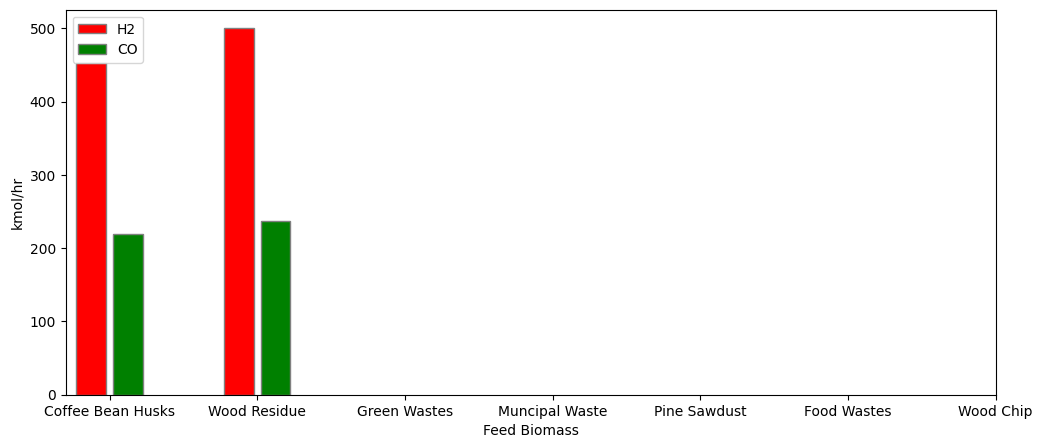

In [7]:
import matplotlib.pyplot as plt

biomass_names=[]
H2=[]
CO=[]
for i in range(len(biomass_result)):
  biomass_names.append(biomass_result['biomass'].iloc[i])
  H2.append(biomass_result['H2(kmol/hr)'].iloc[i])
  CO.append(biomass_result['CO(kmol/hr)'].iloc[i])



br1 = np.arange(len(biomass_names))
br2 = [x + 0.25 for x in br1]
fig=plt.figure(figsize=(12, 5))
plt.bar(br1, H2, color ='r', width = 0.2,
        edgecolor ='grey', label ='H2')
plt.bar(br2, CO, color ='g', width = 0.2,
        edgecolor ='grey', label ='CO')
plt.xlabel('Feed Biomass')
plt.ylabel('kmol/hr')
plt.xticks([r + 0.125 for r in range(len(biomass_names))], biomass_names)
plt.legend()

plt.show()

# Predicting Condition for maximum jet fuel (C8-C16) at fixed feed rate of 20000 kg/hr


We have to create table of


*   biomass
*   maximum product
*   temp at which maximum



In [8]:
maximum_output_table = pd.DataFrame(columns=['Biomass', 'Maxmimum Jet Fuel(Kg/hr)',"Occuring Temperature(deg.C)","Chain Growth Probability"])

def find_maximium_condition(biomass,temp,jet_fuel,a): # a: chain growth probability
  global maximum_output_table # Declare maximum_output_table as global
  max_index=np.array(jet_fuel).argmax()
  new_row = pd.DataFrame([{"Biomass":f"{biomass}", "Maxmimum Jet Fuel(Kg/hr)":f"{jet_fuel[max_index]}","Occuring Temperature(deg.C)":f"{temp[max_index]}","Chain Growth Probability":f"{a}" }])
  maximum_output_table = pd.concat([maximum_output_table, new_row], ignore_index=True)

def show_max_output_table():
  display(maximum_output_table)



# Biomass vs Hydrocarnon range plotting


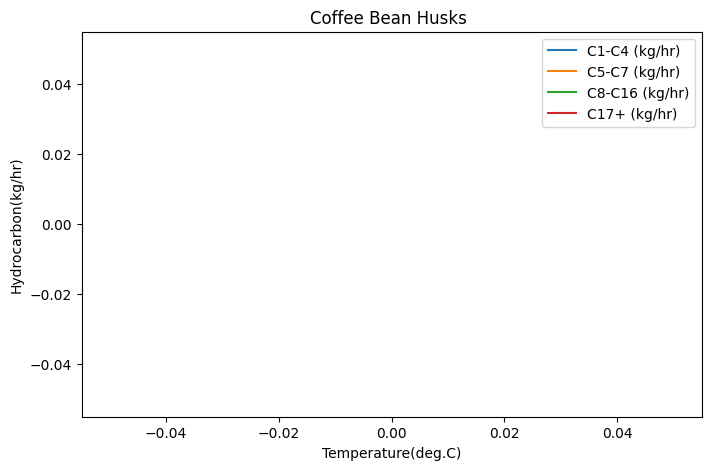

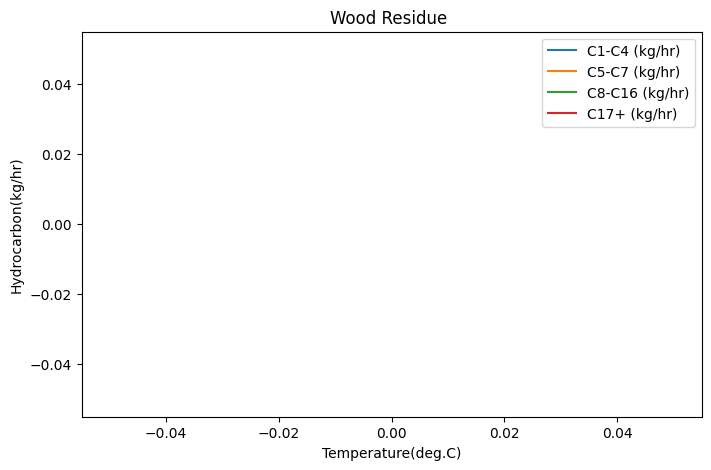

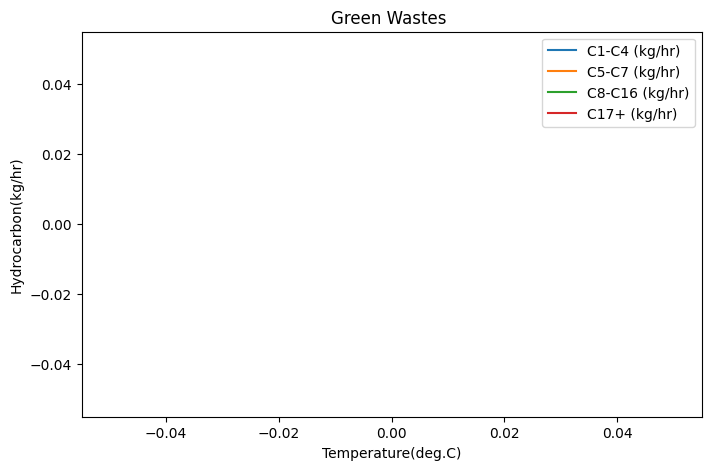

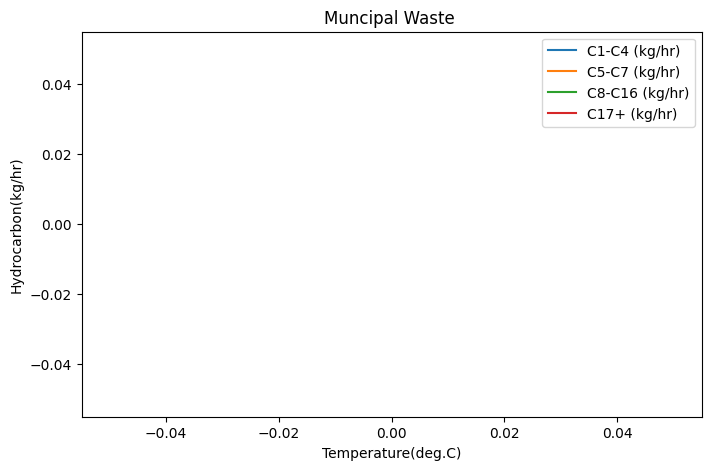

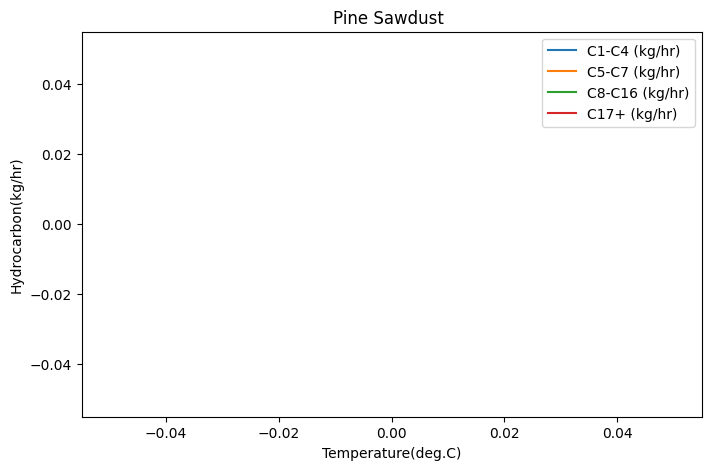

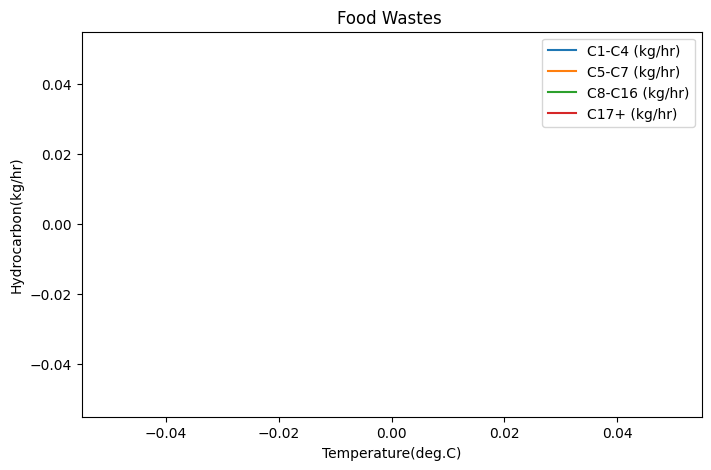

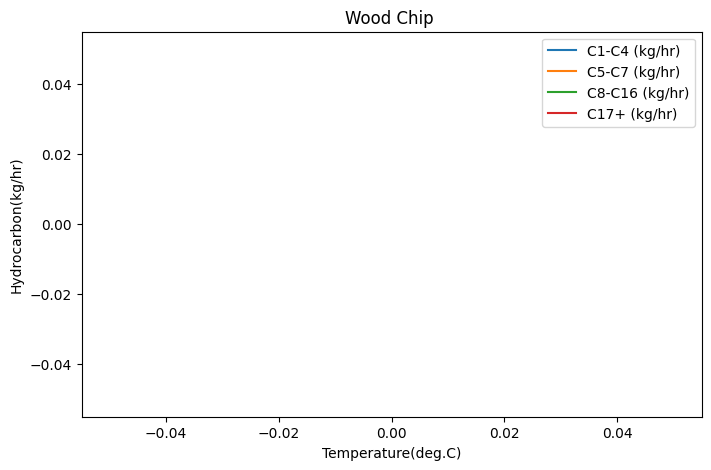

,Biomass,Maxmimum Jet Fuel(Kg/hr),Occuring Temperature(deg.C),Chain Growth Probability
0,Coffee Bean Husks,nan,200,0.9399636032757055
1,Wood Residue,nan,200,0.8857717590430689
2,Green Wastes,nan,200,nan
3,Muncipal Waste,nan,200,nan
4,Pine Sawdust,nan,200,nan
5,Food Wastes,nan,200,nan
6,Wood Chip,nan,200,nan


In [9]:
sheet_names=["coffee-vs-temp","wood_residue-vs-temp","green-vs-temp","muncipal-vs-temp","pine-vs-temp","food-vs-temp","wood_chip-vs-temp"]

def plot_biomass_vs_temp(index):
  biomass_vs_temp=pd.read_csv(f"https://docs.google.com/spreadsheets/d/1xogZ0K7gRvvukae3BMCq91AbCyHS6QY6VOzNGRAYKgg/gviz/tq?tqx=out:csv&sheet={sheet_names[index]}")
  temp=biomass_vs_temp['Temp(deg.C)']
  a=3-biomass_result['H2(kmol/hr)'].iloc[index]/biomass_result['CO(kmol/hr)'].iloc[index] #chain growth probability
  find_maximium_condition(biomass_names[index],temp,biomass_vs_temp['C8-C16 (kg/hr)'],a) # analysing data to find maximum output obtained
  current_fig=plt.figure(figsize=(8,5))
  plt.plot(temp,biomass_vs_temp['C1-C4 (kg/hr)'],label='C1-C4 (kg/hr)')
  plt.plot(temp,biomass_vs_temp['C5-C7 (kg/hr)'],label='C5-C7 (kg/hr)')
  plt.plot(temp,biomass_vs_temp['C8-C16 (kg/hr)'],label='C8-C16 (kg/hr)')
  plt.plot(temp,biomass_vs_temp['C17+ (kg/hr)'],label='C17+ (kg/hr)')
  plt.xlabel('Temperature(deg.C)')
  plt.ylabel('Hydrocarbon(kg/hr)')
  plt.title(f"{biomass_names[index]} ")
  plt.legend()
  plt.show()

for index in range(len(sheet_names)):
  plot_biomass_vs_temp(index)


show_max_output_table() # printing table where maximum of the output is obtained for each biomass

